In [13]:
import pandas as pd
import openpyxl
import numpy as np

In [14]:
df_Rosario= pd.read_excel('./Rosario F.xlsx')

Debera catacterizar el voto utilizando los datos de la muestra y cualquier otra fuente secundaria que considere. Debera subir el codigo utilizado al repositorio y preprar un informe con los descubrimientos mas relevantes.
1. Porcentaje de voto por edad y por genero
2. Datos de georreferenciación
3. Dos regresiones: 1 con edad y 1 con genero.
4. Cruzar voto por radio. 

In [15]:
df_Rosario.shape


(372, 8)

In [16]:
df_Rosario.dtypes


interview__key            object
METODO                    object
Coord1__Latitude         float64
Coord1__Longitude        float64
EDAD                      object
GENERO                    object
INT DE VOTO X ESPACIO     object
RADIO                      int64
dtype: object

In [17]:
df_Rosario.head

<bound method NDFrame.head of     interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0      56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1      67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2      24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3      84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4      21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   
..             ...    ...               ...                ...       ...   
367   347615540259    IVR        -32.941000         -60.688295  56 y mas   
368   347615540658    IVR        -32.970114         -60.653051   16 a 25   
369   347615672682    IVR        -32.907759         -60.752721  56 y mas   
370   348715470373    IVR        -32.942161         -60.639935  56 y mas   
371   387154502466    IVR        -32.957100         -60.637709  56 y mas   

        GENERO INT DE VOTO X ESPACIO      RADIO  
0    Ma

In [18]:
df_Rosario['INT DE VOTO X ESPACIO'] = df_Rosario['INT DE VOTO X ESPACIO'].astype(str)


frecuencias = df_Rosario['INT DE VOTO X ESPACIO'].value_counts()


porcentajes = (frecuencias / frecuencias.sum()) * 100


resultados = pd.DataFrame({
    'Categoría': frecuencias.index,
    'Frecuencia': frecuencias.values,
    'Porcentaje': porcentajes.values
})


print(resultados)


        Categoría  Frecuencia  Porcentaje
0             JxC          90   24.193548
1             FdT          80   21.505376
2  NINGUNO/NOSABE          72   19.354839
3     LIBERTARIOS          57   15.322581
4           OTROS          35    9.408602
5             PNK          26    6.989247
6             FIT          12    3.225806


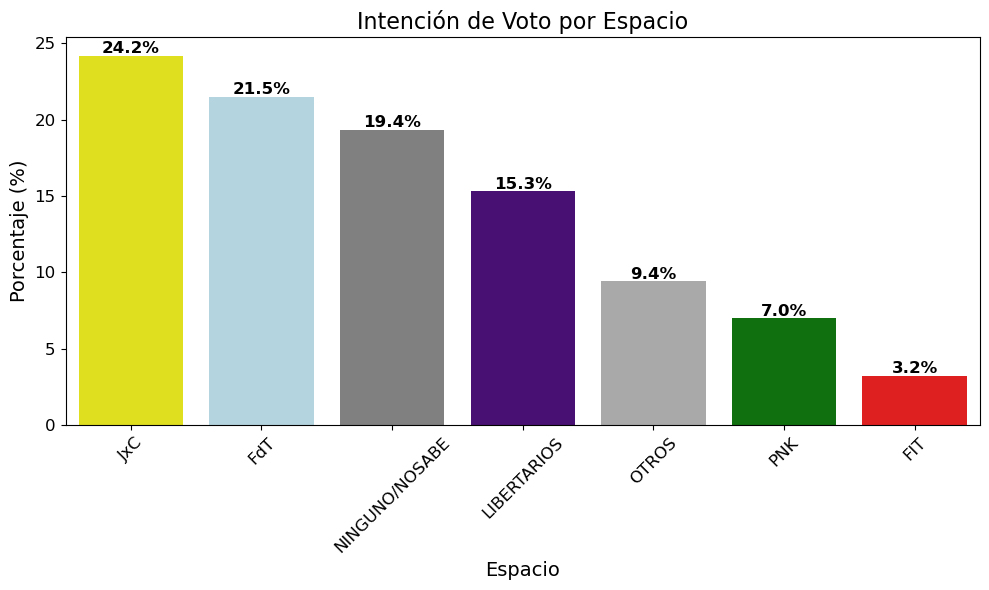

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}


resultados['Color'] = resultados['Categoría'].map(colores)


plt.figure(figsize=(10, 6))

ax = sns.barplot(data=resultados, x='Categoría', y='Porcentaje', 
                 hue='Categoría', palette=colores)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', 
                xytext=(0, 5), textcoords='offset points')  


plt.title('Intención de Voto por Espacio', fontsize=16)
plt.xlabel('Espacio', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

In [20]:

tabla_cruzada = pd.crosstab(df_Rosario['INT DE VOTO X ESPACIO'], df_Rosario['EDAD'])


tabla_cruzada_porcentaje_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100


df_EDAD_VOTO = tabla_cruzada_porcentaje_columna.copy()


print(df_EDAD_VOTO)



EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     3.571429   8.196721   4.040404   1.204819   0.990099
FdT                    25.000000  21.311475  23.232323  15.662651  23.762376
JxC                    25.000000  14.754098  22.222222  24.096386  31.683168
LIBERTARIOS            25.000000  19.672131  16.161616  12.048193  11.881188
NINGUNO/NOSABE         21.428571  18.032787  16.161616  22.891566  19.801980
OTROS                   0.000000   8.196721   8.080808  20.481928   4.950495
PNK                     0.000000   9.836066  10.101010   3.614458   6.930693


In [21]:
df_EDAD_VOTO.dtypes


EDAD
16 a 25     float64
26 a 35     float64
36 a 45     float64
46 a 55     float64
56 y mas    float64
dtype: object

In [22]:
print(df_EDAD_VOTO.columns)


Index(['16 a 25', '26 a 35', '36 a 45', '46 a 55', '56 y mas'], dtype='object', name='EDAD')


In [23]:
print(df_EDAD_VOTO)

EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     3.571429   8.196721   4.040404   1.204819   0.990099
FdT                    25.000000  21.311475  23.232323  15.662651  23.762376
JxC                    25.000000  14.754098  22.222222  24.096386  31.683168
LIBERTARIOS            25.000000  19.672131  16.161616  12.048193  11.881188
NINGUNO/NOSABE         21.428571  18.032787  16.161616  22.891566  19.801980
OTROS                   0.000000   8.196721   8.080808  20.481928   4.950495
PNK                     0.000000   9.836066  10.101010   3.614458   6.930693


In [24]:
df_EDAD_VOTO.reset_index(inplace=True)

In [25]:

df_larga = df_EDAD_VOTO.melt(id_vars='INT DE VOTO X ESPACIO', 
                                 var_name='EDAD', 
                                 value_name='Porcentaje')


print(df_larga.head())

  INT DE VOTO X ESPACIO     EDAD  Porcentaje
0                   FIT  16 a 25    3.571429
1                   FdT  16 a 25   25.000000
2                   JxC  16 a 25   25.000000
3           LIBERTARIOS  16 a 25   25.000000
4        NINGUNO/NOSABE  16 a 25   21.428571


C:\Users\Candela\AppData\Local\Temp\ipykernel_13196\3550010749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_larga, x='EDAD', y='Porcentaje', hue='INT DE VOTO X ESPACIO',


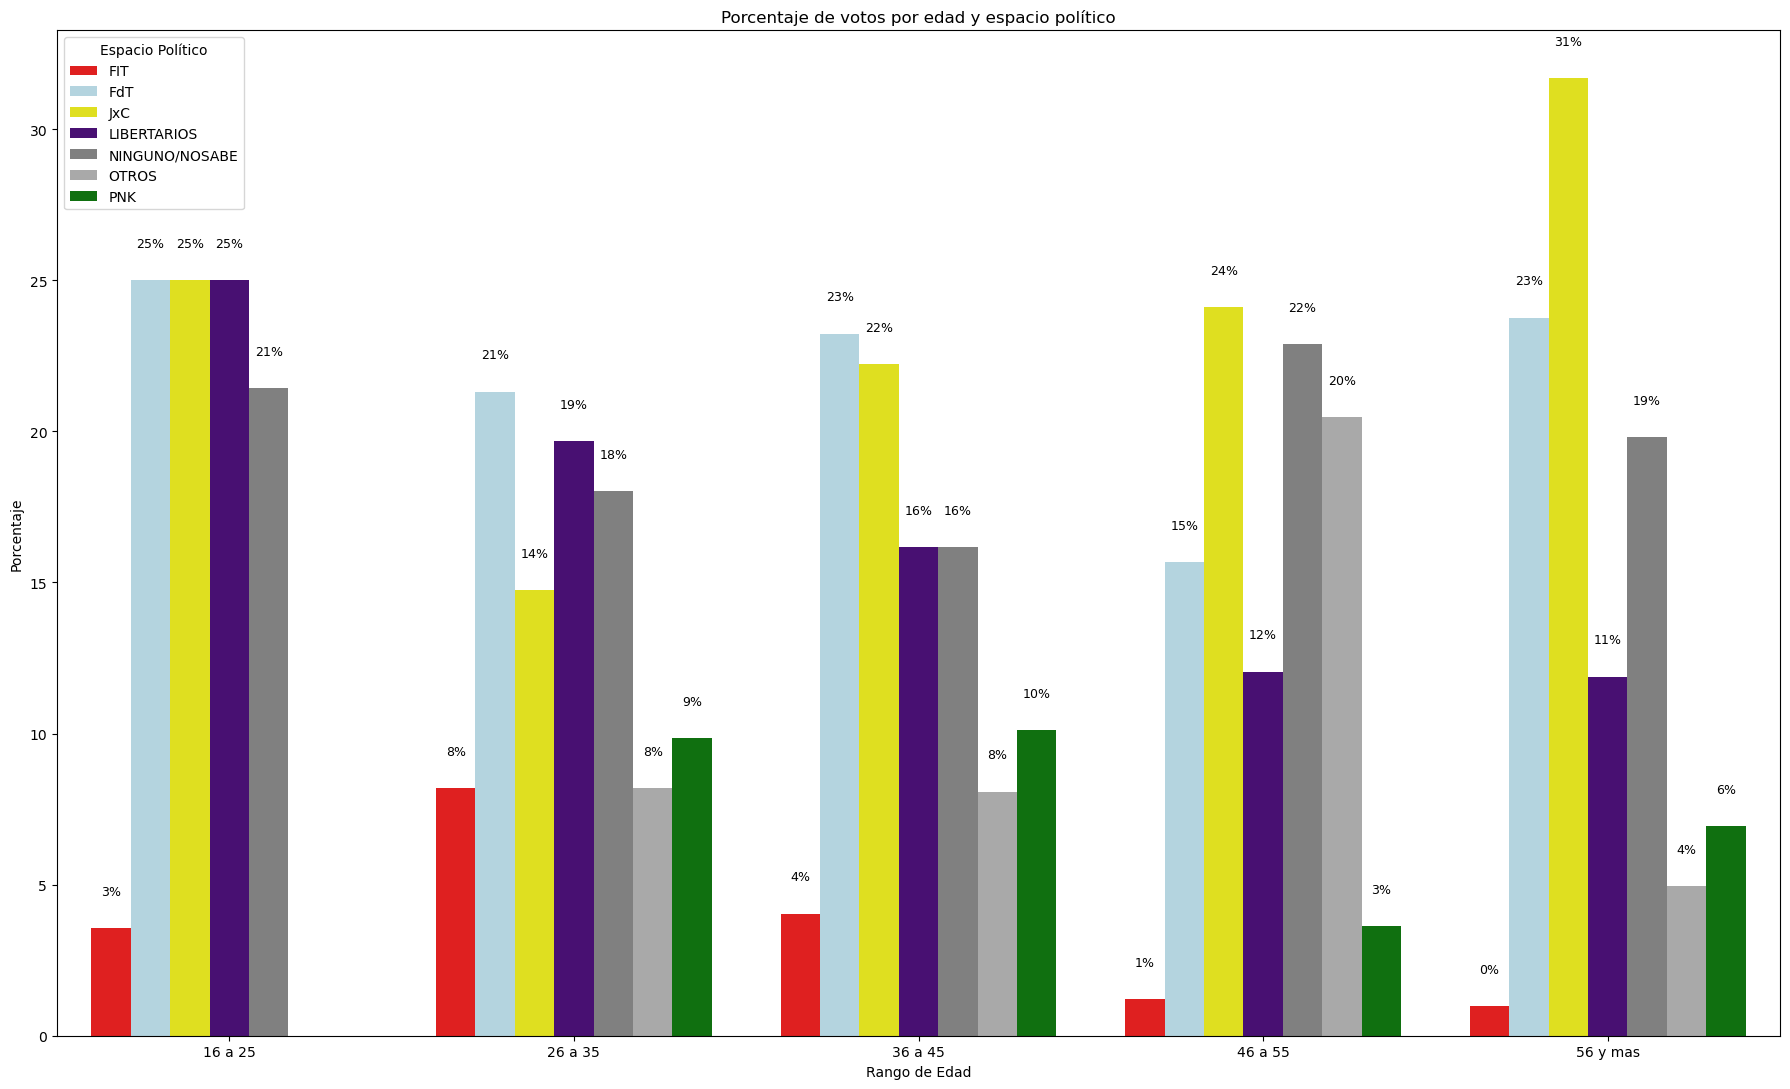

In [26]:

colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}


plt.figure(figsize=(18, 11))


sns.barplot(data=df_larga, x='EDAD', y='Porcentaje', hue='INT DE VOTO X ESPACIO', 
            palette=colores, ci=None)


for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}%', 
                 ha='center', va='bottom', fontsize=9)



plt.title('Porcentaje de votos por edad y espacio político')
plt.xlabel('Rango de Edad')
plt.ylabel('Porcentaje')
plt.legend(title='Espacio Político', loc='upper left')


plt.tight_layout()
plt.show()

In [27]:

tabla_cruzada = pd.crosstab(df_Rosario['INT DE VOTO X ESPACIO'], df_Rosario['GENERO'])


tabla_cruzada_porcentaje_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100


df_porcentajes2 = tabla_cruzada_porcentaje_columna.copy()


print(df_porcentajes2)



GENERO                  Femenino  Masculino       Otro
INT DE VOTO X ESPACIO                                 
FIT                     3.030303   2.525253  22.222222
FdT                    21.212121  22.727273   0.000000
JxC                    25.454545  24.242424   0.000000
LIBERTARIOS             6.666667  22.222222  22.222222
NINGUNO/NOSABE         24.242424  14.141414  44.444444
OTROS                  11.515152   7.575758  11.111111
PNK                     7.878788   6.565657   0.000000


In [28]:
df_porcentajes2.reset_index(inplace=True)


df_larga2 = df_porcentajes2.melt(id_vars='INT DE VOTO X ESPACIO', 
                                 var_name='GENERO', 
                                 value_name='Porcentaje')


print(df_larga2.head())


  INT DE VOTO X ESPACIO    GENERO  Porcentaje
0                   FIT  Femenino    3.030303
1                   FdT  Femenino   21.212121
2                   JxC  Femenino   25.454545
3           LIBERTARIOS  Femenino    6.666667
4        NINGUNO/NOSABE  Femenino   24.242424


In [29]:
print(df_porcentajes2.columns)


Index(['INT DE VOTO X ESPACIO', 'Femenino', 'Masculino', 'Otro'], dtype='object', name='GENERO')


C:\Users\Candela\AppData\Local\Temp\ipykernel_13196\4032621733.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_larga2, x='GENERO', y='Porcentaje', hue='INT DE VOTO X ESPACIO',


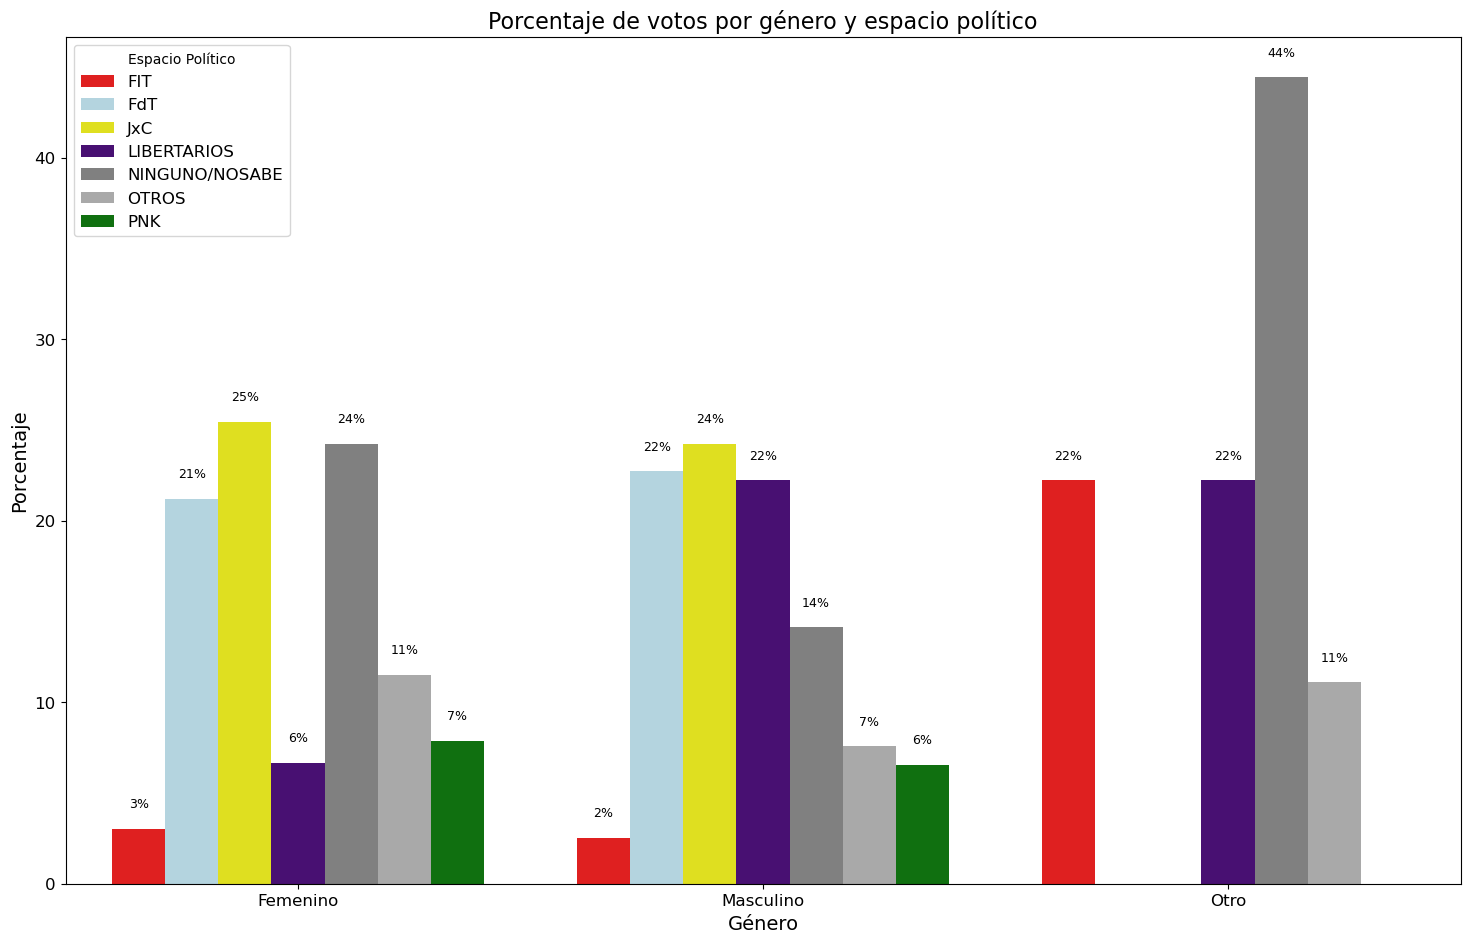

In [30]:
df_larga2 = df_larga2[['GENERO', 'INT DE VOTO X ESPACIO', 'Porcentaje']]


df_larga2.reset_index(drop=True, inplace=True)


plt.figure(figsize=(18, 11))


sns.barplot(data=df_larga2, x='GENERO', y='Porcentaje', hue='INT DE VOTO X ESPACIO', 
            palette=colores, ci=None)


for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}%', 
                 ha='center', va='bottom', fontsize=9)


plt.title('Porcentaje de votos por género y espacio político', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Espacio Político', loc='upper left', fontsize=12)


In [31]:
valores_INTNVOTO = df_Rosario ['INT DE VOTO X ESPACIO'].unique() 
valores_EDAD = df_Rosario ['EDAD'].unique()

print("Valores únicos en INTENCIÓN DE VOTO:", valores_INTNVOTO) 
print("Valores únicos en EDAD:", valores_EDAD)

Valores únicos en INTENCIÓN DE VOTO: ['LIBERTARIOS' 'OTROS' 'NINGUNO/NOSABE' 'JxC' 'FdT' 'PNK' 'FIT']
Valores únicos en EDAD: ['56 y mas' '36 a 45' '26 a 35' '46 a 55' '16 a 25']


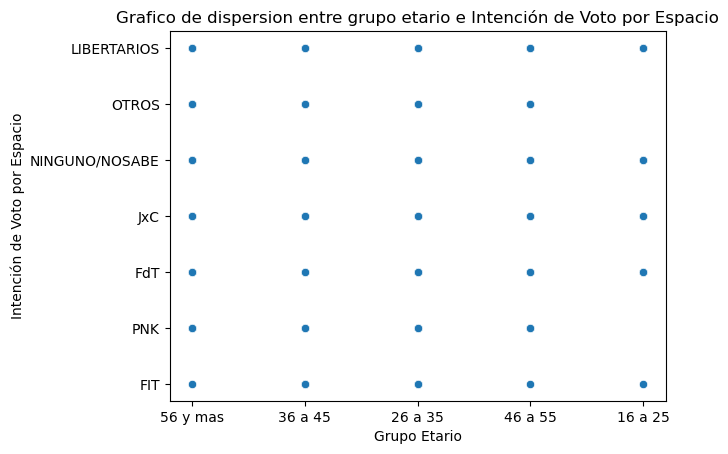

In [32]:
sns.scatterplot(x='EDAD', y='INT DE VOTO X ESPACIO', data=df_Rosario)

plt.title('Grafico de dispersion entre grupo etario e Intención de Voto por Espacio')
plt.xlabel('Grupo Etario')
plt.ylabel('Intención de Voto por Espacio')
plt.show()